In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
file_beer_sales_1=pd.read_csv('./data/2-4-1-beer-sales-1.csv')

In [3]:
file_beer_sales_1.head(3)

,sales
0,87.47
1,103.67
2,83.29


In [4]:
# サンプルサイズ
print(len(file_beer_sales_1))

100


In [5]:
# listにまとめる
data_list=file_beer_sales_1['sales'].values.tolist()
print(data_list)

[87.47, 103.67, 83.29, 131.91, 106.59, 83.59, 109.75, 114.77, 111.52, 93.89, 130.24, 107.8, 87.58, 55.71, 122.5, 99.1, 99.68, 118.88, 116.42, 111.88, 118.38, 115.64, 101.49, 60.21, 112.4, 98.88, 96.88, 70.58, 90.44, 108.36, 127.17, 97.94, 107.75, 98.92, 72.46, 91.7, 92.11, 98.81, 122.0, 115.26, 96.71, 94.93, 113.94, 111.13, 86.22, 85.85, 107.29, 115.37, 97.75, 117.62, 107.96, 87.76, 106.82, 77.41, 128.66, 139.61, 92.66, 79.12, 111.39, 97.3, 148.03, 99.22, 113.79, 100.56, 85.13, 103.78, 63.9, 129.31, 103.07, 143.45, 109.51, 85.8, 112.21, 81.32, 74.93, 105.83, 91.13, 100.02, 101.49, 88.21, 88.63, 97.3, 123.56, 69.53, 111.88, 106.66, 121.26, 93.92, 107.4, 105.34, 89.15, 124.16, 123.21, 114.0, 131.74, 111.17, 74.47, 88.53, 75.51, 90.53]


In [14]:
# don't forget "pip install pymc3"
import pymc3 as pm

In [8]:
with pm.Model() as model:
    data = pm.Data('data', data_list)
    mu = pm.Uniform('mu', 0, 200)
    sigma = pm.Uniform('sigma',  0, 100)
    pm.Normal('y', mu=mu, sigma=sigma, observed=data_list)

In [15]:
with model:
    trace = pm.sample(start=pm.find_MAP(), step=pm.NUTS(), n_init=1000,tune=1000, chains=4, random_seed=1)

logp = -440.13, ||grad|| = 0.014865: 100%|████████████████████████████████████████████| 13/13 [00:00<00:00, 232.65it/s]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains, 0 divergences: 100%|████████████████████████████████████████| 6000/6000 [00:33<00:00, 178.80draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DCBE82240>,
      dtype=object)

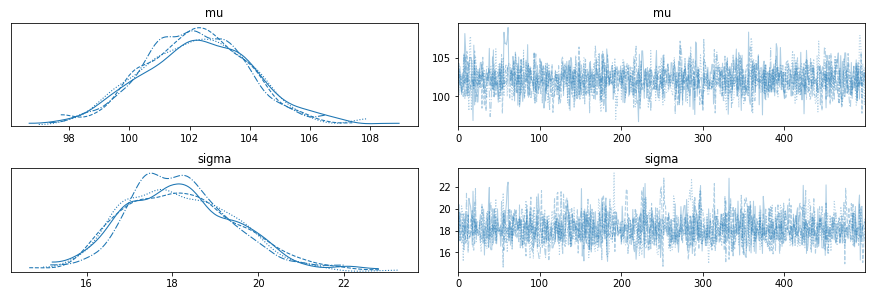

In [20]:
# 収束チェック
pm.traceplot(trace)

In [17]:
# サンプルの要約統計量
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,102.219,1.822,98.811,105.598,0.039,0.028,2184.0,2170.0,2224.0,1362.0,1.0
sigma,18.194,1.311,15.813,20.583,0.029,0.021,2011.0,1982.0,2039.0,1274.0,1.0


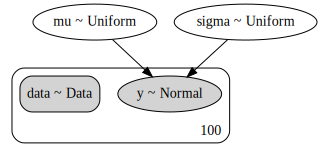

In [18]:
pm.model_to_graphviz(model)